# Module 7 Exercises - Linear Regression

### Exercise 1:

Using the pandas library, load the gradedata.csv file as a dataframe. Narrow your data (make the dataframe smaller) by choosing columns that you think can help predict total travel time. Use any method that you've learned so far to help your decision on which columns to keep. 

In [1]:
import numpy as np # any linear , algebra
import pandas as pd  #data Fram
import matplotlib.pyplot as plt  #making graph #seaborn for beatuiful virsualizations

import sklearn #library for predictive modeling !!!!! 
#(commom in analytic world) -Linear/Logistic/tree-decision+ easy [sample]:Boston,Wine,Dibedest] data set)

%matplotlib inline

In [2]:
Location = "datasets/gradedata.csv"
df = pd.read_csv(Location)

df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [3]:
df.keys()

Index(['fname', 'lname', 'gender', 'age', 'exercise', 'hours', 'grade',
       'address'],
      dtype='object')

In [4]:
df1 = df.drop(['fname', 'lname', 'gender', 'address'], axis =1 )

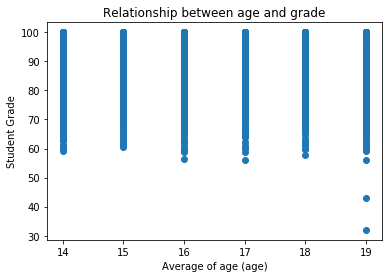

In [5]:
plt.scatter(df1['age'], df1['grade']) #plt = from Matplotlib,make scatter box
plt.xlabel("Average of age (age)") 
plt.ylabel("Student Grade") 
plt.title("Relationship between age and grade") 
plt.show()

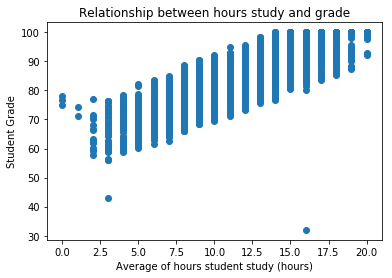

In [6]:
plt.scatter(df1['hours'], df1['grade']) #plt = from Matplotlib,make scatter box
plt.xlabel("Average of hours student study (hours)") 
plt.ylabel("Student Grade") 
plt.title("Relationship between hours study and grade") 
plt.show()

### Exercise 2:

Using the dataframe in the exercise above, clean and prepare your data. This means to eliminate any null (missing) values (either by dropping or filling them) and to transform any data column types to numerical values that a model can interpret. For example, if the column has string values, convert them to integers that best represent their order.

In [7]:
df.head()

,fname,lname,gender,age,exercise,hours,grade,address
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747"
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780"
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060"
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125"
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035"


In [8]:
df1.count() #no missing value

age         2000
exercise    2000
hours       2000
grade       2000
dtype: int64

In [9]:
# REPLACE empty cells with 0  #with no spicify [column] will fill everything the same
#df.fillna(0)

In [10]:
def numeric_column(x):
    if x=='female':
        return 1
    if x=='male':
        return 0
    
df['gender_v'] = df['gender'].apply(numeric_column) # gerder_val is a new column


In [11]:
df.head()

,fname,lname,gender,age,exercise,hours,grade,address,gender_v
0,Marcia,Pugh,female,17,3,10,82.4,"9253 Richardson Road, Matawan, NJ 07747",1
1,Kadeem,Morrison,male,18,4,4,78.2,"33 Spring Dr., Taunton, MA 02780",0
2,Nash,Powell,male,18,5,9,79.3,"41 Hill Avenue, Mentor, OH 44060",0
3,Noelani,Wagner,female,14,2,7,83.2,"8839 Marshall St., Miami, FL 33125",1
4,Noelani,Cherry,female,18,4,15,87.4,"8304 Charles Rd., Lewis Center, OH 43035",1


### Exercise 3:

Using the cleaned dataframe in the exercise above, use the sklearn library to split the data into training and test datasets. Make the test size 30%.

In [26]:
#import sklearn
#from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression



#assign linear regression [function] to a variable
lm = LinearRegression()
lm 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
df2 = df.drop(['fname', 'lname', 'gender', 'address'], axis =1 )

In [28]:
#make a [NEW dataframe = X] X contain all other column we use for predicting..
X = df2.drop('grade', axis = 1)

In [29]:
df2.head()

,age,exercise,hours,grade,gender_v
0,17,3,10,82.4,1
1,18,4,4,78.2,0
2,18,5,9,79.3,0
3,14,2,7,83.2,1
4,18,4,15,87.4,1


In [30]:
#make a [NEW dataframe = X] that only contains predictive features
X = df2.drop('grade', axis = 1)
#y = df2['grade']

In [31]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size==0.33, random_state = 5)

In [32]:
X.head()

,age,exercise,hours,gender_v
0,17,3,10,1
1,18,4,4,0
2,18,5,9,0
3,14,2,7,1
4,18,4,15,1


In [33]:
X.columns

Index(['age', 'exercise', 'hours', 'gender_v'], dtype='object')

In [34]:
lm.fit(X, df2['grade'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: 57.638961698390865


In [36]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 4


In [37]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,age,0.040501
1,exercise,0.984133
2,hours,1.917324
3,gender_v,0.448484


In [38]:
lm.predict(X)[0:5]

array([80.90159641, 69.9738035 , 80.54455494, 74.04398978, 91.51284876])

In [39]:
lm.score(X, df2['grade'])

0.6645580504702335

model predit 66% correctly

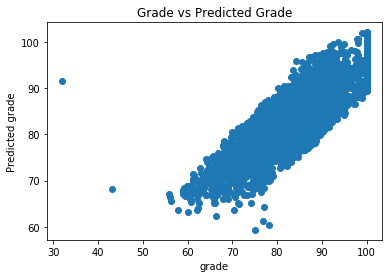

In [40]:
plt.scatter(df2['grade'], lm.predict(X))
plt.xlabel("grade")
plt.ylabel("Predicted grade")
plt.title("Grade vs Predicted Grade")
plt.show()

### Exercise 4:

Using the training data from the previous exercise, set a linear regression function to fit the data (build the model).

In [41]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, df2.grade, test_size=0.33, random_state = 5) #set up [randow] test size to be .33% #set the random evry 5 rows
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1340, 4)
(660, 4)
(1340,)
(660,)


In [42]:
lm.fit(X_train, Y_train)

#above Model learn from [Training data] True value data and with answer

#NOW

#[predictions] for training and [test data]

pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [43]:
#evaluate the accuracy of the model of training vs test
print(lm.score(X_train, Y_train))
print(lm.score(X_test, Y_test))

0.6827104100890926
0.6252226287723646


66% and 62%

### Exercise 5:

What is the intercept coefficient (y-intercept) for the linear regression model?

### Exercise 6:

Use the predict function on the training data and the test data.

### Exercise 7:

Calculate the MSE (mean squared error) of the training and test predictions. How "good" was the linear regression model at predicting the test data compared to the training data?